In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
data = pd.read_csv('rcSales.csv')

In [110]:
data.head(15)

,Month,Volume
0,01/01/2001,648
1,01/02/2001,646
2,01/03/2001,639
3,01/04/2001,654
4,01/05/2001,630
5,01/06/2001,622
6,01/07/2001,617
7,01/08/2001,613
8,01/09/2001,661
9,01/10/2001,695


In [111]:
data.shape

(114, 2)

In [112]:
data['Month'].max()

'01/12/2009'

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   114 non-null    object
 1   Volume  114 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [114]:
data['Month'] = pd.to_datetime(data['Month'],format='%d/%m/%Y')

In [115]:
data.head()

,Month,Volume
0,2001-01-01,648
1,2001-02-01,646
2,2001-03-01,639
3,2001-04-01,654
4,2001-05-01,630


In [116]:
data.set_index('Month',inplace=True)

In [117]:
data.head()

,Volume
Month,
2001-01-01,648
2001-02-01,646
2001-03-01,639
2001-04-01,654
2001-05-01,630


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2001-01-01 to 2010-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [119]:
test_data=data.reset_index()

In [120]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   114 non-null    datetime64[ns]
 1   Volume  114 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2001-01-01 to 2010-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [122]:
data

,Volume
Month,
2001-01-01,648
2001-02-01,646
2001-03-01,639
2001-04-01,654
2001-05-01,630
...,...
2010-02-01,1425
2010-03-01,1419
2010-04-01,1432


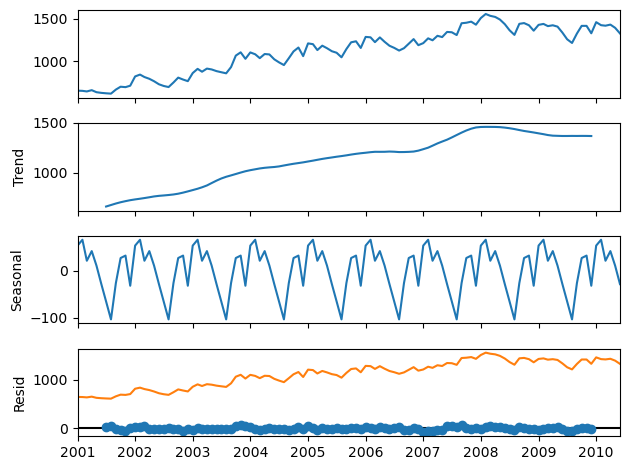

In [123]:
plt.plot(data)
plt.show()

In [124]:
data.index.min()

Timestamp('2001-01-01 00:00:00')

In [125]:
data.index.max()

Timestamp('2010-06-01 00:00:00')

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
#tsa --> time series analysis

In [127]:
result = seasonal_decompose(data)

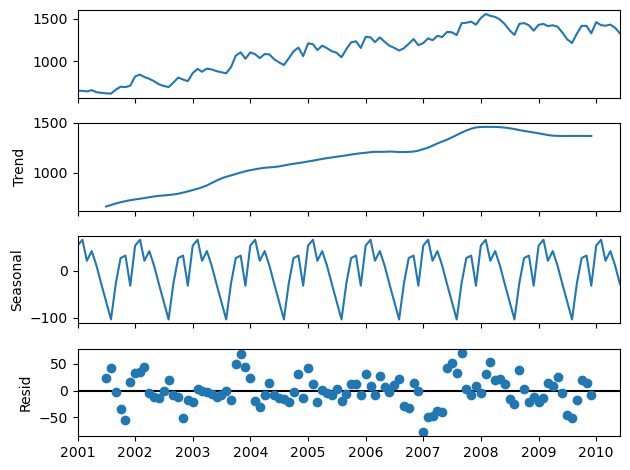

In [128]:
result.plot()

In [129]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

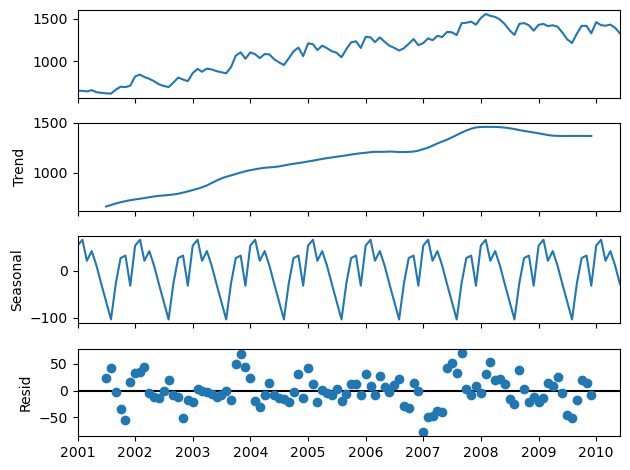

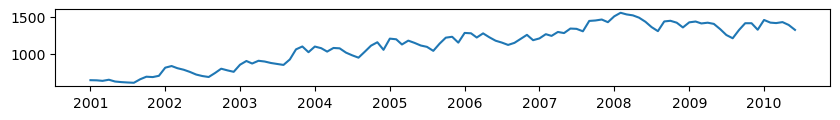

In [130]:
plt.figure(figsize=(10,1))
plt.plot(data)
plt.show()

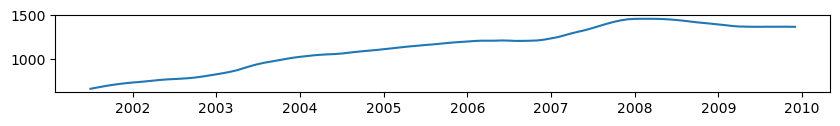

In [131]:
plt.figure(figsize=(10,1))
plt.plot(result.trend)
plt.show()

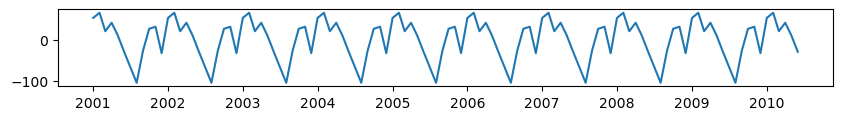

In [132]:
plt.figure(figsize=(10,1))
plt.plot(result.seasonal)
plt.show()

In [133]:
data.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01'],
              dtype='datetime64[ns]', name='Month', length=114, freq=None)

In [134]:
data.index.year

Index([2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
       ...
       2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Month', length=114)

In [135]:
import seaborn as sns

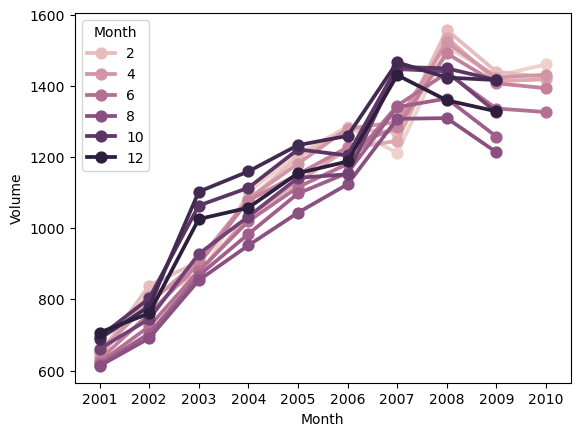

In [136]:
sns.pointplot(data=data,x=data.index.year,y='Volume',hue=data.index.month)
plt.show()

In [137]:
data.index.month

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6],
      dtype='int32', name='Month', length=114)

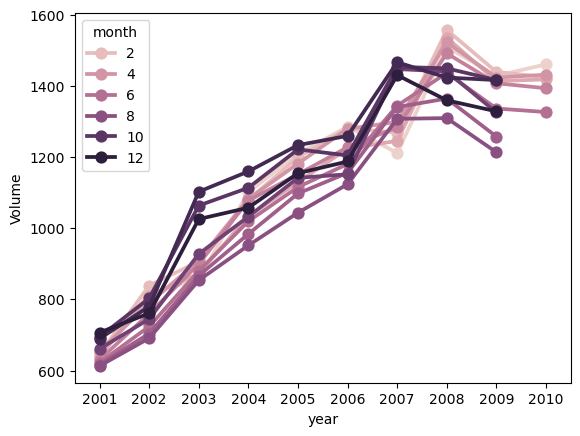

In [138]:
df_temp = data.copy()
df_temp['month']=data.index.month
df_temp['year']=data.index.year
sns.pointplot(data=df_temp, x='year', y='Volume', hue='month')
plt.show()

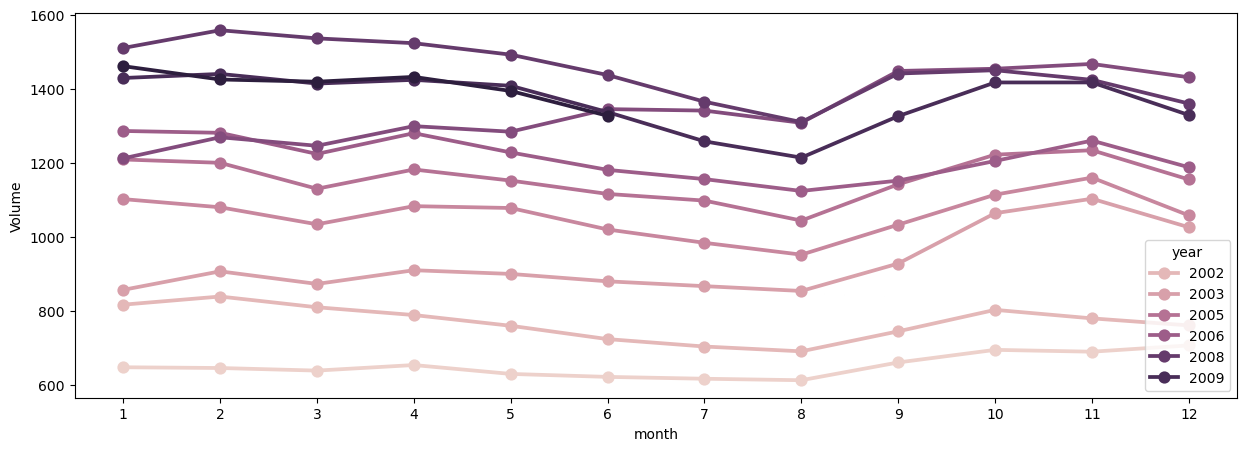

In [139]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_temp, x='month', y='Volume', hue='year')
plt.show()

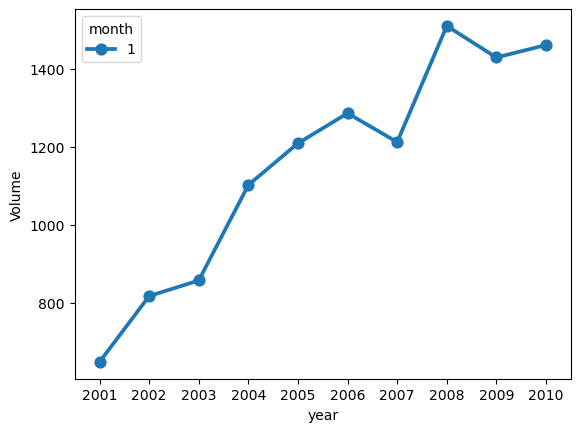

In [140]:
sns.pointplot(data=df_temp[df_temp.month==1], x='year', y='Volume', hue='month')
plt.show()

In [141]:
from statsmodels.tsa.stattools import adfuller

In [142]:
x=data['Volume']
result = adfuller(x)

print(result)

(-1.5365971444531619, 0.5153358797821723, 12, 101, {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}, 1028.4238367341432)


In [143]:
print('P-Value:',result[1])
p_val = result[1]
if (p_val <= 0.05):
    print('Reject Null-Hypothesis, data is Stationary')
else:
    print('Accpet Null-Hypothesis, data is Non-Stationary')

# (Null-Hypothesis)H0 --> Data is Non-Stationary
# (Alternative-Hypothesis)H1 --> Data is Stationary

P-Value: 0.5153358797821723
Accpet Null-Hypothesis, data is Non-Stationary


In [144]:
data['first_diff'] = data['Volume']-data['Volume'].shift(1)

In [145]:
data.head()

,Volume,first_diff
Month,,
2001-01-01,648,NaN
2001-02-01,646,-2.0
2001-03-01,639,-7.0
2001-04-01,654,15.0
2001-05-01,630,-24.0


In [146]:
x=data['first_diff'].dropna()
result = adfuller(x)

print('P-Value:',result[1])
p_val = result[1]
if (p_val <= 0.05):
    print('Reject Null-Hypothesis, data is Stationary')
else:
    print('Accpet Null-Hypothesis, data is Non-Stationary')

P-Value: 0.314081837060851
Accpet Null-Hypothesis, data is Non-Stationary


In [147]:
data['second_diff'] = data['Volume']-data['Volume'].shift(2)

In [148]:
x=data['second_diff'].dropna()
result = adfuller(x)

print('P-Value:',result[1])
p_val = result[1]
if (p_val <= 0.05):
    print('Reject Null-Hypothesis, data is Stationary')
else:
    print('Accpet Null-Hypothesis, data is Non-Stationary')

P-Value: 0.31283085594129556
Accpet Null-Hypothesis, data is Non-Stationary


In [149]:
data['third_diff'] = data['Volume']-data['Volume'].shift(3)
x=data['third_diff'].dropna()
result = adfuller(x)

print('P-Value:',result[1])
p_val = result[1]
if (p_val <= 0.05):
    print('Reject Null-Hypothesis, data is Stationary')
else:
    print('Accpet Null-Hypothesis, data is Non-Stationary')

P-Value: 0.3145666236797575
Accpet Null-Hypothesis, data is Non-Stationary


In [150]:
data['forth_diff'] = data['Volume']-data['Volume'].shift(4)
x=data['forth_diff'].dropna()
result = adfuller(x)

print('P-Value:',result[1])
p_val = result[1]
if (p_val <= 0.05):
    print('Reject Null-Hypothesis, data is Stationary')
else:
    print('Accpet Null-Hypothesis, data is Non-Stationary')

P-Value: 0.3092393765399768
Accpet Null-Hypothesis, data is Non-Stationary


In [151]:
data['fifth_diff'] = data['Volume']-data['Volume'].shift(5)
x=data['fifth_diff'].dropna()
result = adfuller(x)

print('P-Value:',result[1])
p_val = result[1]
if (p_val <= 0.05):
    print('Reject Null-Hypothesis, data is Stationary')
else:
    print('Accpet Null-Hypothesis, data is Non-Stationary')

P-Value: 0.03344859896351668
Reject Null-Hypothesis, data is Stationary


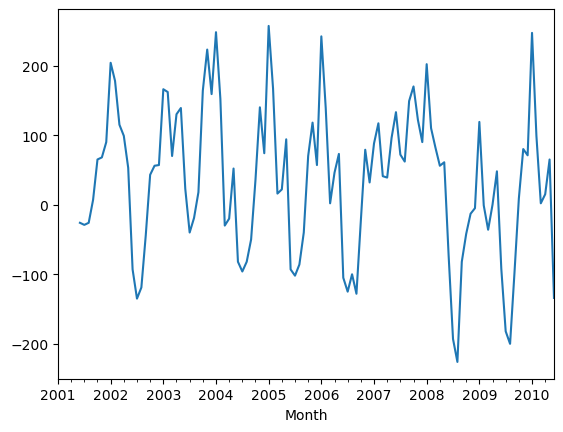

In [152]:
data['fifth_diff'].plot()
plt.show()

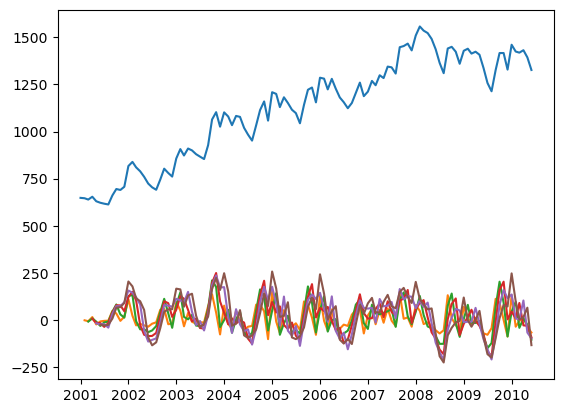

In [155]:
plt.plot(data)
plt.show()

In [184]:
from statsmodels.tsa.arima_model import ARIMA

### ARIMA --> Is combination of models like (AutoRegression+(differencing)+MovingAverage)
#### Parameter 
* p - no.of lag observation 
* d - differencing
* q - Size of the moving average window
* order (p,d,q)

In [186]:
model = ARIMA(data['Volume'],order=(1,0,0),freq='MS')
model_fit = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [187]:
from statsmodels.tsa.arima.model import ARIMA

In [188]:
model = ARIMA(data['Volume'],order=(1,0,0),freq='MS')
model_fit = model.fit()

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
data['AR_Forecast']=model_fit.predict(start=92,end=114)

<Axes: xlabel='Month'>

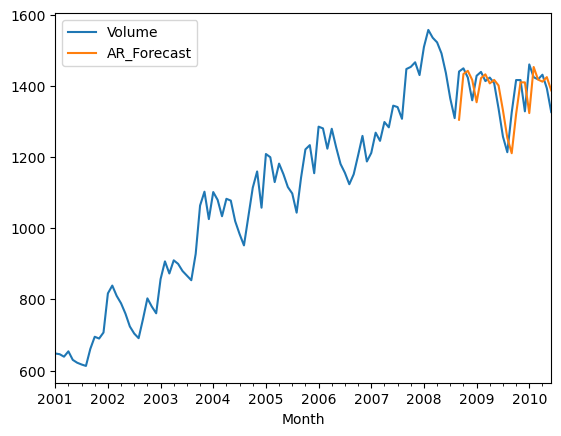

In [167]:
data[['Volume','AR_Forecast']].plot()
plt.show()

In [171]:
data.head(10)

,Volume,first_diff,second_diff,third_diff,forth_diff,fifth_diff,AR_Forecast
Month,,,,,,,
2001-01-01,648,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,646,-2.0,NaN,NaN,NaN,NaN,NaN
2001-03-01,639,-7.0,-9.0,NaN,NaN,NaN,NaN
2001-04-01,654,15.0,8.0,6.0,NaN,NaN,NaN
2001-05-01,630,-24.0,-9.0,-16.0,-18.0,NaN,NaN
2001-06-01,622,-8.0,-32.0,-17.0,-24.0,-26.0,NaN
2001-07-01,617,-5.0,-13.0,-37.0,-22.0,-29.0,NaN
2001-08-01,613,-4.0,-9.0,-17.0,-41.0,-26.0,NaN
2001-09-01,661,48.0,44.0,39.0,31.0,7.0,NaN


In [170]:
data.tail(10)

,Volume,first_diff,second_diff,third_diff,forth_diff,fifth_diff,AR_Forecast
Month,,,,,,,
2009-09-01,1326,112.0,68.0,-11.0,-82.0,-98.0,1211.158425
2009-10-01,1417,91.0,203.0,159.0,80.0,9.0,1321.154962
2009-11-01,1417,0.0,91.0,203.0,159.0,80.0,1410.527149
2009-12-01,1329,-88.0,-88.0,3.0,115.0,71.0,1410.527149
2010-01-01,1461,132.0,44.0,44.0,135.0,247.0,1324.101298
2010-02-01,1425,-36.0,96.0,8.0,8.0,99.0,1453.740075
2010-03-01,1419,-6.0,-42.0,90.0,2.0,2.0,1418.384045
2010-04-01,1432,13.0,7.0,-29.0,103.0,15.0,1412.491373
2010-05-01,1394,-38.0,-25.0,-31.0,-67.0,65.0,1425.258828


In [172]:
import datetime

In [173]:
from dateutil.relativedelta import relativedelta

In [180]:
start = datetime.datetime.strptime('2010-06-01','%Y-%m-%d')
datelist = [start + relativedelta(months=x) for x in range(1,12)]

print(datelist)

[datetime.datetime(2010, 7, 1, 0, 0), datetime.datetime(2010, 8, 1, 0, 0), datetime.datetime(2010, 9, 1, 0, 0), datetime.datetime(2010, 10, 1, 0, 0), datetime.datetime(2010, 11, 1, 0, 0), datetime.datetime(2010, 12, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 2, 1, 0, 0), datetime.datetime(2011, 3, 1, 0, 0), datetime.datetime(2011, 4, 1, 0, 0), datetime.datetime(2011, 5, 1, 0, 0)]


In [181]:
future = pd.DataFrame(index=datelist,columns=data.columns)
data2=pd.concat([data,future])

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_899/3124973230.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data2=pd.concat([data,future])


In [182]:
data.tail(1)

,Volume,first_diff,second_diff,third_diff,forth_diff,fifth_diff,AR_Forecast
Month,,,,,,,
2010-06-01,1327,-67.0,-105.0,-92.0,-98.0,-134.0,1387.938574


In [190]:
data2.tail(15)

,Volume,first_diff,second_diff,third_diff,forth_diff,fifth_diff,AR_Forecast
2010-03-01,1419,-6.0,-42.0,90.0,2.0,2.0,1418.384045
2010-04-01,1432,13.0,7.0,-29.0,103.0,15.0,1412.491373
2010-05-01,1394,-38.0,-25.0,-31.0,-67.0,65.0,1425.258828
2010-06-01,1327,-67.0,-105.0,-92.0,-98.0,-134.0,1387.938574
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data2['Future_prediction'] = model_fit.predict(start='2010-07-01',end='2011-05-01')

<Axes: >

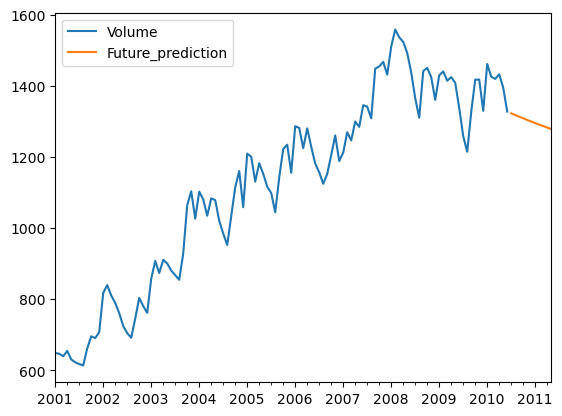

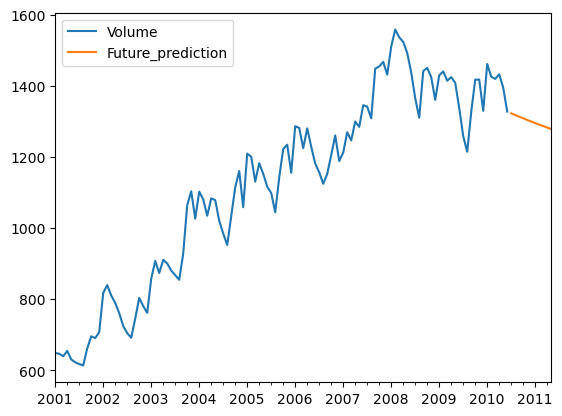

In [192]:
data2[['Volume','Future_prediction']].plot()
plt.show()

In [193]:
data2.tail(15)

,Volume,first_diff,second_diff,third_diff,forth_diff,fifth_diff,AR_Forecast,Future_prediction
2010-03-01,1419,-6.0,-42.0,90.0,2.0,2.0,1418.384045,NaN
2010-04-01,1432,13.0,7.0,-29.0,103.0,15.0,1412.491373,NaN
2010-05-01,1394,-38.0,-25.0,-31.0,-67.0,65.0,1425.258828,NaN
2010-06-01,1327,-67.0,-105.0,-92.0,-98.0,-134.0,1387.938574,NaN
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1322.137074
2010-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1317.361137
2010-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1312.670632
2010-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1308.064031
2010-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1303.539833
2010-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1299.096564


In [194]:
model2 = ARIMA(data['Volume'],order=(1,0,1),freq='MS')
model2_fit = model.fit()

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


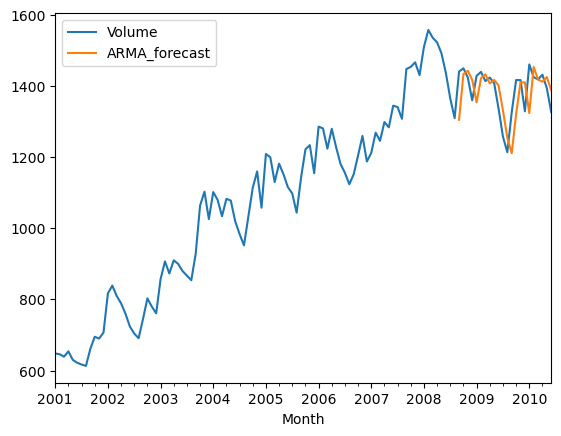

In [195]:
data['ARMA_forecast'] = model_fit.predict(start=92, end=114)
data[['Volume','ARMA_forecast']].plot()
plt.show()

In [189]:

#Optimize p, d, q:
# Use pmdarima's auto_arima function to automate the selection of p, d, q

from pmdarima import auto_arima 
auto_model = auto_arima(time_series, seasonal=False) 
print(auto_model.summary())

ModuleNotFoundError: No module named 'pmdarima'